# Neural Network: XY -> Grayscale

> This is a simplified version of `./01_nn_xy_2_grey.ipynb` - I just took out all the diagrams and text.

## Assignment

- __Extend the model in this notebook into one which maps (X,Y) -> (R,G,B).__
- __Add at least 2 more layers to the network.__
- __Experiment with alternative activation functions and optimizers.__
- __In a paragraph or so, describe how the image we have created differs from a normal image.__

You can find other images to play with [from SciKit Image here](https://scikit-image.org/docs/dev/api/skimage.data.html), but of course you could experiment with using you're own images. For that you might want to use the [Pillow](https://pillow.readthedocs.io/en/stable/) package which has some [handy functions for loading and manipulating images](https://pillow.readthedocs.io/en/stable/reference/Image.html).

This shouldn't take you longer than an afternoon! __This will be handed in at the end of the module__ so once you have something working it would be _much appreciated_ if you go back over your code and tidy it up, maybe add comments to describe what is happening in the code.

I also recommend you make a fresh GitHub repo where you can keep your 3 small assignments and your final major assignment for the module - neatly organised.

Here are some more lovely examples from [David Ha](https://twitter.com/hardmaru):

![David Ha bw](./images/hardmaru_color.png)

---

If you like this work you could take some ideas explored by David Ha in his blog posts on this topic and re-implement them, or take them further for your final project. I think there is a lot of potential for creating really interesting images and even interesting drawing tools!

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

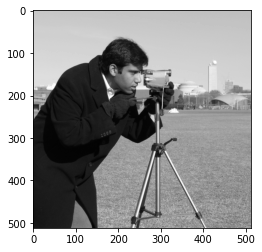

In [2]:
img = skimage.data.camera()
smaller_img = resize(img, (64, 64)) # Resize it just to make things quicker
plt.imshow(img, cmap='gray')

In [3]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])
    return mgrid

In [4]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
y = tf.reshape(smaller_img, [-1, 1])  # Outpus

2022-01-17 14:53:10.081590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 14:53:10.085087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-01-17 14:53:10.085139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2022-01-17 14:53:10.085260: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [5]:
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='mse', optimizer='sgd')

In [6]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 3s 571us/step - loss: 0.0573
Epoch 2/8
4096/4096 [==============================] - 2s 535us/step - loss: 0.0367
Epoch 3/8
4096/4096 [==============================] - 2s 531us/step - loss: 0.0283
Epoch 4/8
4096/4096 [==============================] - 2s 540us/step - loss: 0.0241
Epoch 5/8
4096/4096 [==============================] - 2s 521us/step - loss: 0.0215
Epoch 6/8
4096/4096 [==============================] - 2s 524us/step - loss: 0.0199
Epoch 7/8
4096/4096 [==============================] - 2s 528us/step - loss: 0.0187
Epoch 8/8
4096/4096 [==============================] - 2s 533us/step - loss: 0.0179


In [7]:
# Our traning data is stored in 'X', so lets pass that
# into our trained model and see what it produces.
prediction = model.predict(X)

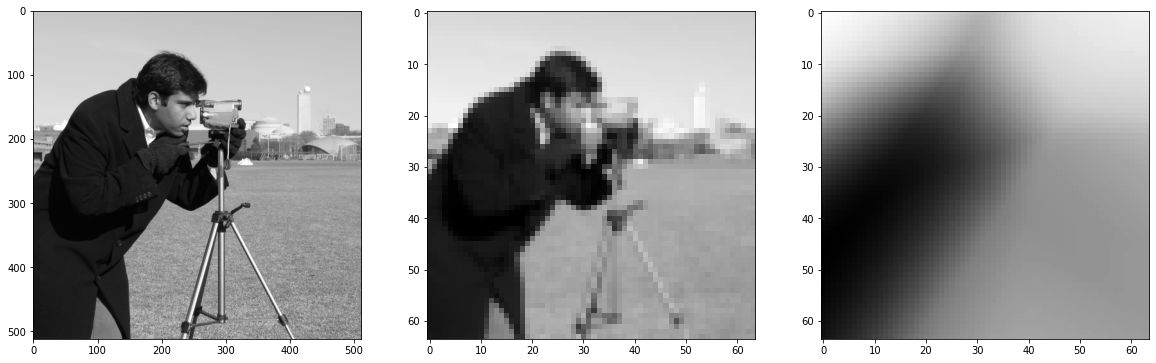

In [8]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img, cmap='gray')
axes_array[1].imshow(smaller_img, cmap='gray')
axes_array[2].imshow(reconstructed_img, cmap='gray')
plt.show()